# Compare the loss difference for different n_grid and dtype

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp
import pickle

In [38]:
from datetime import datetime
today = datetime.today().strftime('%Y%m%d')
log_dir = f"logs/{today}"
os.makedirs(log_dir, exist_ok=True)

In [ ]:
data_path = "/data/ruihan/projects/PhysDreamer/physdreamer/warp_mpm/logs/20250321"
# Load pickle file as dictionary
with open(osp.join(data_path, "loss_dict_f32.pkl"), "rb") as f:
    loss_dict_f32 = pickle.load(f)
print(loss_dict_f32)
with open(osp.join(data_path, "loss_dict_f64.pkl"), "rb") as f:
    loss_dict_f64 = pickle.load(f)
print(loss_dict_f64)


{'torch': {1: {0: 101.6270523071289, 1: 101.62651062011719}, 2: {0: 236.51043701171875, 1: 236.50927734375}, 3: {0: 0.7613372802734375, 1: 0.7612762451171875}, 4: {0: -9.1552734375e-05, 1: -3.0517578125e-05}, 5: {0: 4.57763671875e-05, 1: 7.62939453125e-05}}, 'warp': {1: {0: 101.62706, 1: 101.62651}, 2: {0: 236.5104, 1: 236.50932}, 3: {0: 0.7613733, 1: 0.7612559}, 4: {0: -1.5377998e-05, 1: -3.886223e-05}, 5: {0: 1.04904175e-05, 1: 9.918213e-05}}}
{'torch': {1: {0: 101.62704996953534, 1: 101.62650866522293}, 2: {0: 236.5104234114029, 1: 236.50931858811845}, 3: {0: 0.7613194948867061, 1: 0.7613166641557996}, 4: {0: 0.0, 1: 1.1368683772161603e-13}, 5: {0: 4.263256414560601e-14, 1: 1.1368683772161603e-13}}, 'warp': {1: {0: 101.62704996953534, 1: 101.62650866522293}, 2: {0: 236.5104234114029, 1: 236.50931858811848}, 3: {0: 0.7613194948866818, 1: 0.7613166641557796}, 4: {0: -1.6564527527407336e-13, 1: -5.3290705182007514e-14}, 5: {0: -3.2862601528904634e-14, 1: 2.8133051444001467e-13}}}


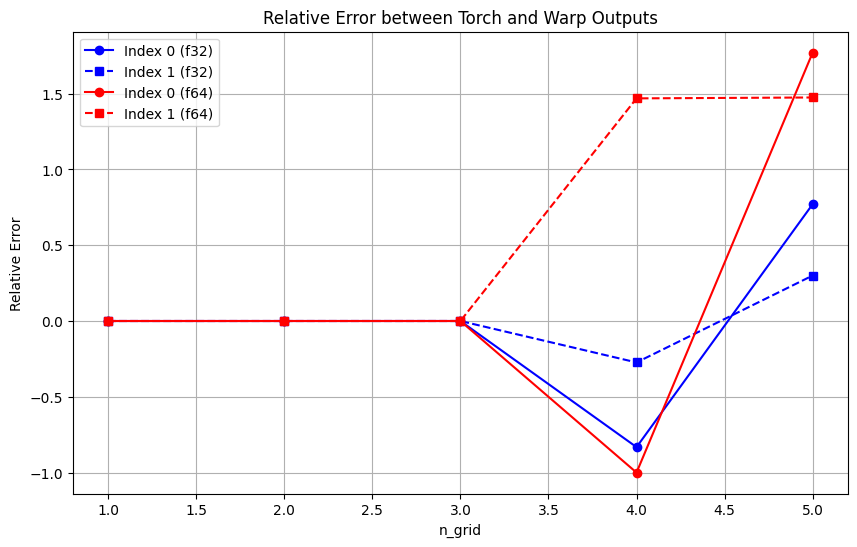

In [43]:
def relative_error(a, b):
    """Calculate the relative error between a and b."""
    if a == 0:
        if b == 0:
            return 0.0
        else:
            return abs(a - b) / b
    else:
        return abs(a - b) / a


# Calculate relative errors for each n_grid and index number
relative_errors_0_f32 = []
relative_errors_1_f32 = []

for n_grid in [int(x) for x in loss_dict_f32['torch'].keys()]:
    torch_value_0 = loss_dict_f32['torch'][n_grid][0]
    warp_value_0 = loss_dict_f32['warp'][n_grid][0]
    relative_error_0 = relative_error(torch_value_0, warp_value_0)
    relative_errors_0_f32.append(relative_error_0)

    torch_value_1 = loss_dict_f32['torch'][n_grid][1]
    warp_value_1 = loss_dict_f32['warp'][n_grid][1]
    relative_error_1 = relative_error(torch_value_1, warp_value_1)
    relative_errors_1_f32.append(relative_error_1)

# repeat the same for f64
relative_errors_0_f64 = []
relative_errors_1_f64 = []

for n_grid in [int(x) for x in loss_dict_f64['torch'].keys()]:
    torch_value_0 = loss_dict_f64['torch'][n_grid][0]
    warp_value_0 = loss_dict_f64['warp'][n_grid][0]
    relative_error_0 = relative_error(torch_value_0, warp_value_0)
    relative_errors_0_f64.append(relative_error_0)

    torch_value_1 = loss_dict_f64['torch'][n_grid][1]
    warp_value_1 = loss_dict_f64['warp'][n_grid][1]
    relative_error_1 = relative_error(torch_value_1, warp_value_1)
    relative_errors_1_f64.append(relative_error_1)


# Plot the relative errors for index 0 and index 1
n_grids = list(loss_dict_f32['torch'].keys())
plt.figure(figsize=(10, 6))

# Plotting for f32
plt.plot(n_grids, relative_errors_0_f32, label='Index 0 (f32)', marker='o', linestyle='-', color='b')
plt.plot(n_grids, relative_errors_1_f32, label='Index 1 (f32)', marker='s', linestyle='--', color='b')

# Plotting for f64
plt.plot(n_grids, relative_errors_0_f64, label='Index 0 (f64)', marker='o', linestyle='-', color='r')
plt.plot(n_grids, relative_errors_1_f64, label='Index 1 (f64)', marker='s', linestyle='--', color='r')

plt.xlabel('n_grid')
plt.ylabel('Relative Error')
plt.title('Relative Error between Torch and Warp Outputs')
plt.legend()
plt.grid(True)

# Show plot
plt.savefig(osp.join(log_dir, "loss_relative_error.png"))
plt.show()


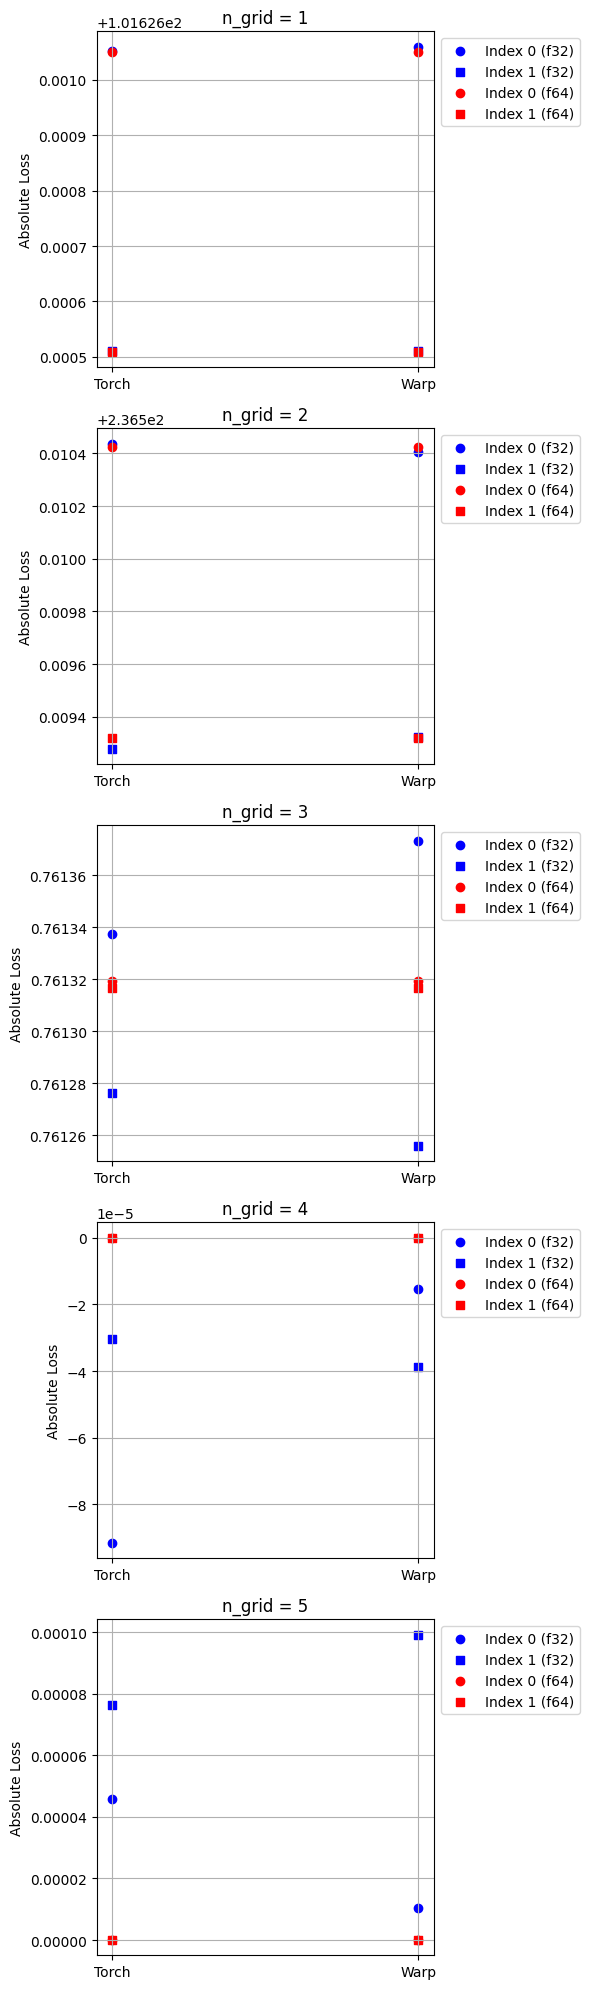

In [42]:
# Create subplots to plot each n_grid value separately
n_grids = list(loss_dict_f32['torch'].keys())
# n_grids = [4, 5]

num_plots = len(n_grids)

fig, axes = plt.subplots(num_plots, 1, figsize=(6, 4 * num_plots))

for idx, n_grid in enumerate(n_grids):
    # Get the values for each n_grid
    torch_value_0_f32 = loss_dict_f32['torch'][n_grid][0]
    warp_value_0_f32 = loss_dict_f32['warp'][n_grid][0]
    torch_value_1_f32 = loss_dict_f32['torch'][n_grid][1]
    warp_value_1_f32 = loss_dict_f32['warp'][n_grid][1]

    torch_value_0_f64 = loss_dict_f64['torch'][n_grid][0]
    warp_value_0_f64 = loss_dict_f64['warp'][n_grid][0]
    torch_value_1_f64 = loss_dict_f64['torch'][n_grid][1]
    warp_value_1_f64 = loss_dict_f64['warp'][n_grid][1]
    
    # # Plot for index 0 and index 1 for the current n_grid
    axes[idx].scatter([0, 1], [torch_value_0_f32, warp_value_0_f32], label='Index 0 (f32)', marker='o', color='b')
    axes[idx].scatter([0, 1], [torch_value_1_f32, warp_value_1_f32], label='Index 1 (f32)', marker='s', color='b')
    axes[idx].scatter([0, 1], [torch_value_0_f64, warp_value_0_f64], label='Index 0 (f64)', marker='o', color='r')
    axes[idx].scatter([0, 1], [torch_value_1_f64, warp_value_1_f64], label='Index 1 (f64)', marker='s', color='r')

    
    axes[idx].set_title(f'n_grid = {n_grid}')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Torch', 'Warp'])
    axes[idx].set_ylabel('Absolute Loss')
    axes[idx].grid(True)
    # put the legend outside of the plot
    axes[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))
    # axes[idx].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(osp.join(log_dir, "loss_scatter_n_grids.png"), dpi=300)
plt.show()